In [1]:
import monkdata as m
from dtree import *
import dtree as d
import numpy as np

import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


In [4]:
mean = []
rate_tree = []

monk1train, monk1val = partition(m.monk1, 0.8)
t = d.buildTree(monk1train, m.attributes)

m_prun = allPruned(t)

for i in range( len(m_prun) ):
   rate_tree.append(d.check(m_prun[i], monk1val))
max_index = np.argmax(rate_tree)
error_stand = m_prun[max_index]

print('The first correctness is ', rate_tree[max_index])
value_1 = rate_tree[max_index]
value2 = 1
# Start with a small value
while value2 >= value_1 :
    rate_tree = []
    old_prun = m_prun
    old_m_in = max_index
    
    m_prun = allPruned( m_prun[max_index] )
    for i in range( len(m_prun) ):
        rate_tree.append(d.check(m_prun[i], monk1val))
        
    max_index = np.argmax(rate_tree)
    value2 = rate_tree[max_index]
    
    print(f"Current value: {value2}")

print("Loop finished!")



The first correctness is  0.8
Current value: 0.84
Current value: 0.84
Current value: 0.32
Loop finished!


In [5]:
d.check(old_prun[old_m_in], monk1val)


0.84

In [4]:
from drawtree_qt5 import *
#drawTree(t)
drawTree(old_prun[old_m_in])

2025-02-05 17:12:21.008 python[7237:937237] +[IMKClient subclass]: chose IMKClient_Modern


SystemExit: 0

/Users/yanjun/Documents/apps/miniconda3/envs/dd2421/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [70]:
rate_mean = [0,0,0,0,0,0]
num_iterations = 500
rate_all = []
for k in range(num_iterations):
   for j in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
      mean = []
      rate_tree = []
      

      monk1train, monk1val = partition(m.monk1, j)
      t = d.buildTree(monk1train, m.attributes)

      m_prun = allPruned(t)

      for i in range( len(m_prun) ):
         rate_tree.append(d.check(m_prun[i], monk1val))
      max_index = np.argmax(rate_tree)
      error_stand = m_prun[max_index]

      #print('The first correctness is ', rate_tree[max_index])
      value_1 = rate_tree[max_index]
      value2 = 1
      # Start with a small value
       
      while value2 >= value_1 :
          rate_tree1 = []
          old_prun = m_prun
          old_m_in = max_index
    
          m_prun = allPruned( m_prun[max_index] )
          for i in range( len(m_prun) ):
              rate_tree1.append(d.check(m_prun[i], monk1val))
        
          max_index = np.argmax(rate_tree1)
          value2 = rate_tree1[max_index]
    
          #print(f"Current value: {value2}")
      rate_all.append(value2)

   
   rate_mean =np.add(rate_mean, rate_all) 
   
   rate_all = []
 


rate_mean = rate_mean/num_iterations
print(rate_mean)

error = [ 1-i for i in rate_mean]


[0.70949425 0.74544    0.78177419 0.8064     0.81194737 0.80248   ]


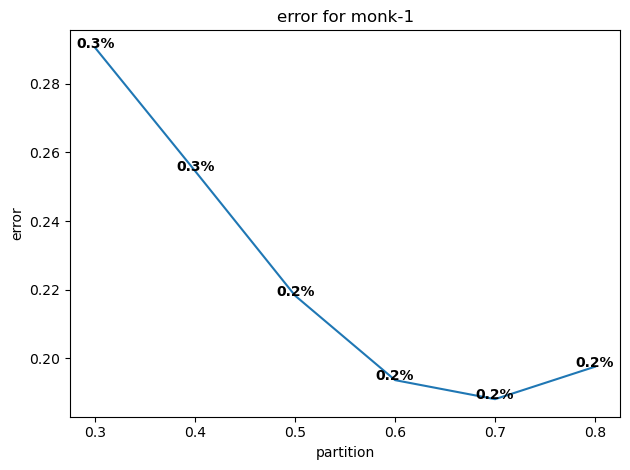

In [72]:
import matplotlib.pyplot as plt

# Sample data

x = ['0.3','0.4','0.5','0.6','0.7','0.8']
y1 = error

# Create a plot
plt.plot(x, y1)

for i, v in enumerate(y1):
    plt.text(i, v , f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Labels and title\
plt.xlabel("partition")
plt.ylabel("error")
plt.title("error for monk-1")
plt.tight_layout()
# Show the plot

#plt.savefig('variance_monk3.png')

plt.show()